In [114]:
# install missing packets in jupyter notebook
!pip install cmdstanpy
!pip install arviz
!pip install scipy
!pip install ipywidgets widgetsnbextension pandas-profiling

You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


In [115]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

## Excercise 1 -  Modeling prior predictive distribution

In [116]:
# task 1-5
number_of_trials = 50
gen_quant = CmdStanModel(stan_file='code_1.stan')
samples = gen_quant.sample(data={'N':number_of_trials}, 
                           fixed_param=True, 
                           iter_sampling=1000, 
                           iter_warmup=0, 
                           chains = 1)

# Without data block
# samples = gen_quant.sample(fixed_param=True, 
#                            iter_sampling=1000, 
#                            iter_warmup=0, 
#                            chains = 1)

df = samples.draws_pd()
print(df.head())

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.



   lp__  accept_stat__     y         p
0   0.0            0.0   8.0  0.236740
1   0.0            0.0   9.0  0.243573
2   0.0            0.0   5.0  0.184153
3   0.0            0.0   5.0  0.103732
4   0.0            0.0  11.0  0.144087


   lp__  accept_stat__     y         p
0   0.0            0.0   8.0  0.236740
1   0.0            0.0   9.0  0.243573
2   0.0            0.0   5.0  0.184153
3   0.0            0.0   5.0  0.103732
4   0.0            0.0  11.0  0.144087


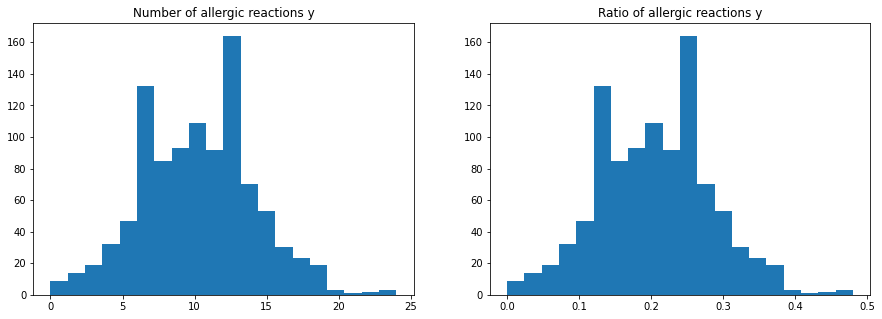

Mean of y:  10.168
Mean of ratio:  0.20336


In [117]:
# task 6-7
df = samples.draws_pd()
print(df.head())

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].hist(df["y"], bins=20)
axs[0].set_title("Number of allergic reactions y")
ratio = df["y"]/number_of_trials
axs[1].hist(ratio, bins=20)
axs[1].set_title("Ratio of allergic reactions y")
plt.show()

print("Mean of y: ", df["y"].mean())
print("Mean of ratio: ", ratio.mean())

In [118]:
## Excercise 2 -  Modeling posterior and posterior predictive distribution
# task 1-2
number_of_allergic_reactions = 7
model_posterior = CmdStanModel(stan_file='code_2.stan')
# Generate default number of samples from appropriate method in ```cmdstanpy```.
samples_posterior = model_posterior.sample(data={'N':number_of_trials,
                                                 'y':number_of_allergic_reactions})

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


      lp__  accept_stat__  stepsize__  treedepth__  n_leapfrog__  divergent__  \
0 -22.5629       0.991723    0.970287          1.0           3.0          0.0   
1 -22.5481       1.000000    0.970287          1.0           1.0          0.0   
2 -22.8780       0.866469    0.970287          2.0           3.0          0.0   
3 -22.8780       0.598480    0.970287          2.0           3.0          0.0   
4 -22.8780       0.302757    0.970287          1.0           1.0          0.0   

   energy__         p  y_pred  
0   22.6454  0.188059     7.0  
1   22.5614  0.185602    11.0  
2   23.3836  0.210049     6.0  
3   25.0549  0.210049     7.0  
4   24.8141  0.210049     8.0  


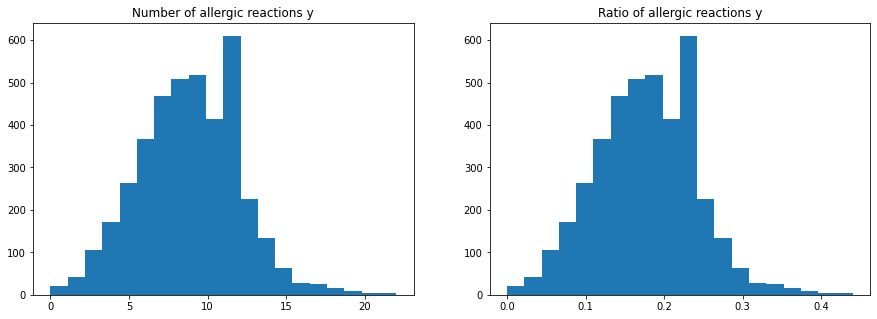

In [119]:
# task 3
# Compute ratio of predicted allergic reactions for each sample and create a histogram.
df_posterior = samples_posterior.draws_pd()
print(df_posterior.head())
ratio_posterior = df_posterior["y_pred"]/number_of_trials
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].hist(df_posterior["y_pred"], bins=20)
axs[0].set_title("Number of allergic reactions y")
axs[1].hist(ratio_posterior, bins=20)
axs[1].set_title("Ratio of allergic reactions y")
plt.show()


arviz - WARNING - Shape validation failed: input_shape: (1, 4000), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 4000), minimum_shape: (chains=2, draws=4)


Mean of predicted ratio:  0.175
Density interval of predicted ratio: 
 - lower: 0.06
 - upper: 0.28
Mean of probability:  0.175
Density interval of probability:
 - lower: 0.109731
 - upper: 0.251458

Probability that ratio is lower than the average probability:  0.487


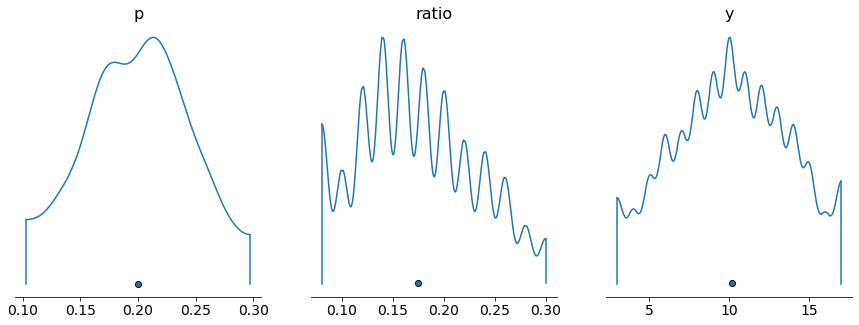

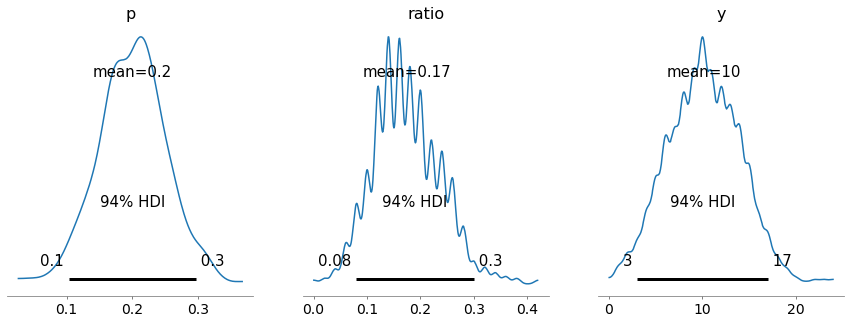

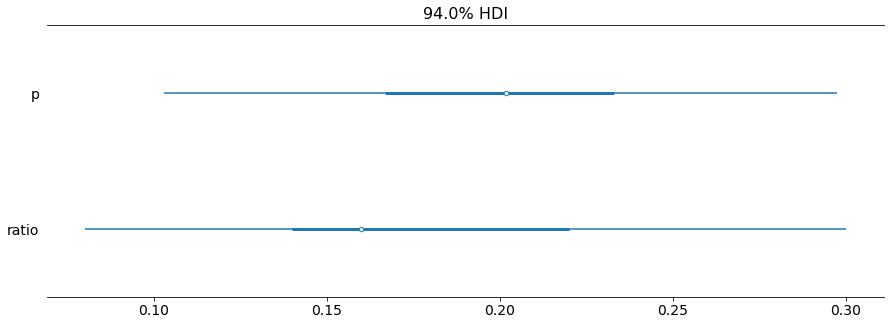

In [121]:
# task 4-5
# Compute the expected value and 94% density interval of the predicted ratio, 
# compare it with expected value and 94% density interval of parameter p. 
# Use arviz package.
predicted_ratio_summary = az.summary(ratio_posterior.to_numpy(), hdi_prob=0.94)
predicted_ratio_mean = predicted_ratio_summary["mean"].values[0]
# predicted_ratio_mean = ratio_posterior.mean()
predicted_ratio_density = az.hdi(ratio_posterior.to_numpy(), hdi_prob=0.94)
print("Mean of predicted ratio: ", predicted_ratio_mean)
print("Density interval of predicted ratio: ")
print(f" - lower: {predicted_ratio_density[0]}")
print(f" - upper: {predicted_ratio_density[1]}")

probability_summary = az.summary(df_posterior["p"].to_numpy(), hdi_prob=0.94)
probability_mean = probability_summary.mean().values[0]
# probability_mean = df_posterior["p"].mean()
probability_density = az.hdi(df_posterior["p"].to_numpy(), hdi_prob=0.94)
print("Mean of probability: ", probability_mean)
print("Density interval of probability:")
print(f" - lower: {probability_density[0]}")
print(f" - upper: {probability_density[1]}")

data = az.convert_to_inference_data(samples)
ratio_dataset = az.convert_to_dataset(ratio_posterior.to_numpy(), group="posterior")
data.posterior["ratio"] = ratio_dataset["x"] 

az.plot_density(data, var_names=["p", "ratio", "y"], figsize=(15, 5))
az.plot_posterior(data, var_names=["p", "ratio", "y"], figsize=(15, 5))
az.plot_forest(data, var_names=["p", "ratio"], figsize=(15, 5))

# Compute the probability that ratio is lower than the average probability from traditional vaccines 
# (count the number of simulated ratios that are smaller).
probability_ratio_lower = (ratio_posterior < probability_mean).sum()/len(ratio_posterior)
print("\nProbability that ratio is lower than the average probability: ", probability_ratio_lower)